# DATA PREPARATION

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
from tensorflow.keras import layers, models, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import clone_model, Model
from sklearn.model_selection import train_test_split

In [3]:
cifar10 = tf.keras.datasets.cifar10
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


In [4]:
print(f"Training set shape: {X_train.shape}")
print(f"Test set shape: {X_test.shape}")
print(f"Traning set labels: {y_train.shape}")
print(f"Test set labels: {y_test.shape}")

Training set shape: (50000, 32, 32, 3)
Test set shape: (10000, 32, 32, 3)
Traning set labels: (50000, 1)
Test set labels: (10000, 1)


In [5]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

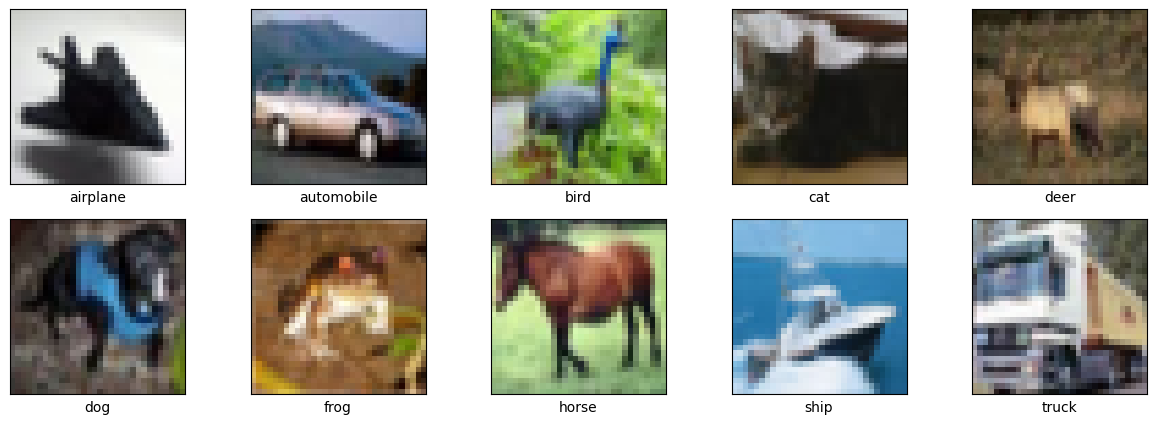

In [6]:

# Find 1 image for each class
samples = []
for class_index in range(10):
    idx = np.where(y_train.flatten() == class_index)[0][0]  # find first occurrence
    samples.append(idx)

# Plot 1 image per class in order
plt.figure(figsize=(15, 5))
for i, idx in enumerate(samples):
    plt.subplot(2, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[idx])
    plt.xlabel(class_names[y_train[idx][0]])
plt.show()


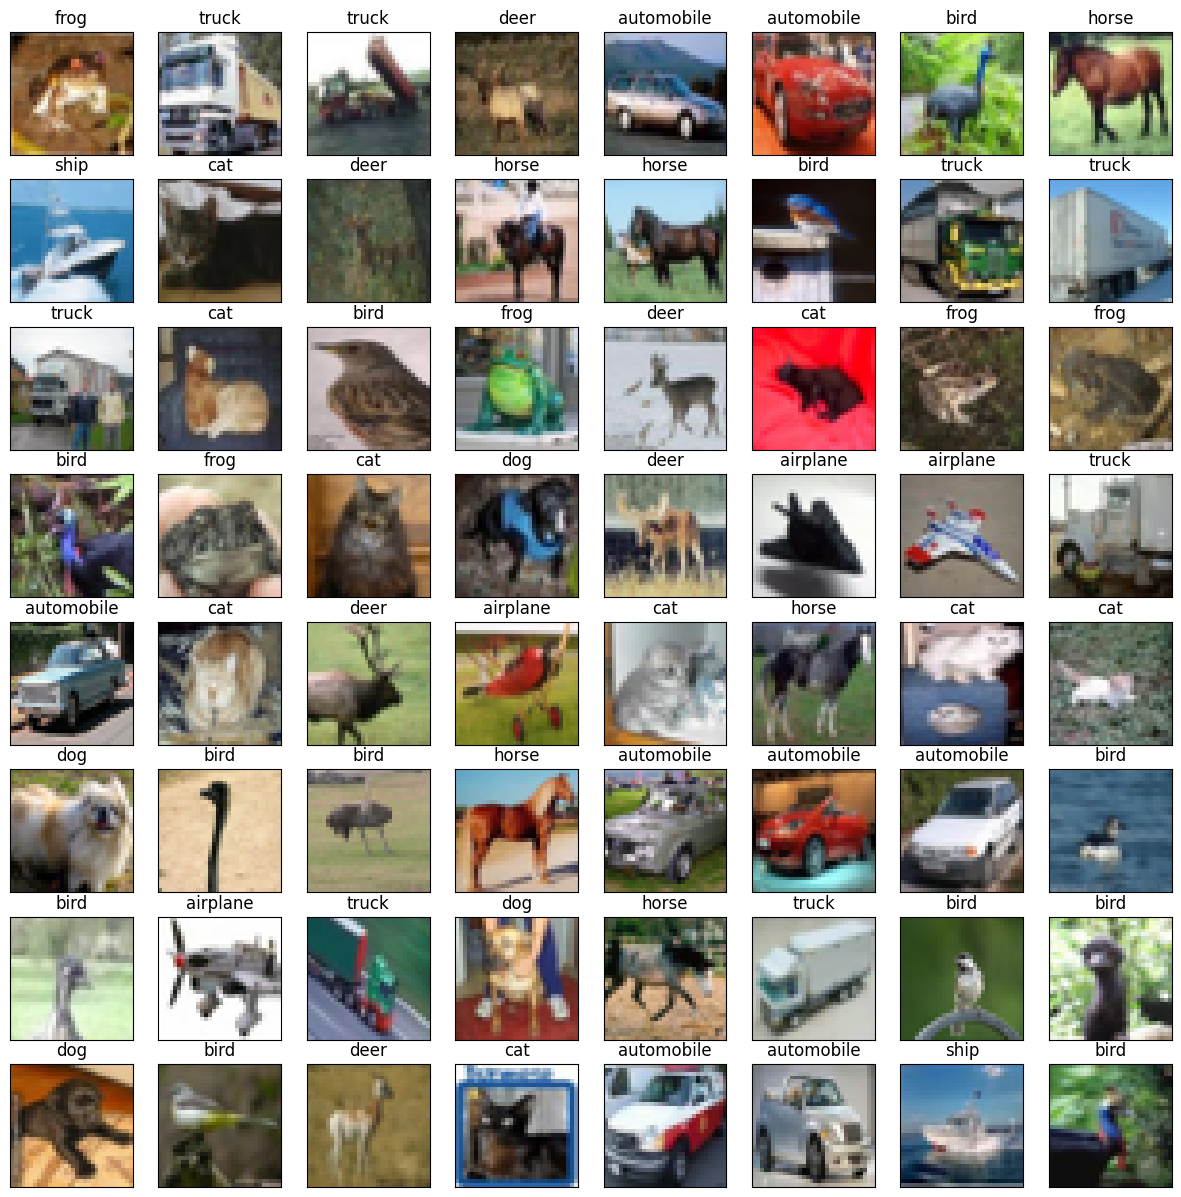

In [7]:
plt.figure(figsize=(15,15))

for i in range(64):
    plt.subplot(8, 8, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)

    plt.imshow(X_train[i])

    plt.title(class_names[y_train[i][0]], fontsize=12)

plt.show()

In [8]:
# what is an image?
X_train[0][0][0]   # tells the RGB channel

array([59, 62, 63], dtype=uint8)

In [9]:
np.max(X_train), np.min(X_train)

# gives you the maximum value in the whole array
# gives you the mainimum value in the whole array
# tells if range goes from 0-255 than u need to scale them


(np.uint8(255), np.uint8(0))

# Scaling

In [10]:
X_train = X_train.astype('float32') / 255.0  #Neural networks work better with floating-point numbers. to convert into float
X_test = X_test.astype('float32') / 255.0    #Dividing by 255.0 scales them to 0–1. as in images we use min max scaling

In [11]:
unique, counts = np.unique(y_train, return_counts=True)

#unique → array of unique label values (e.g., [0, 1, 2, 3, 4, 5, 6, 7, 8, 9] for CIFAR-10)
#counts → array of how many times each label occurs (e.g., [5000, 5000, 5000, ...])

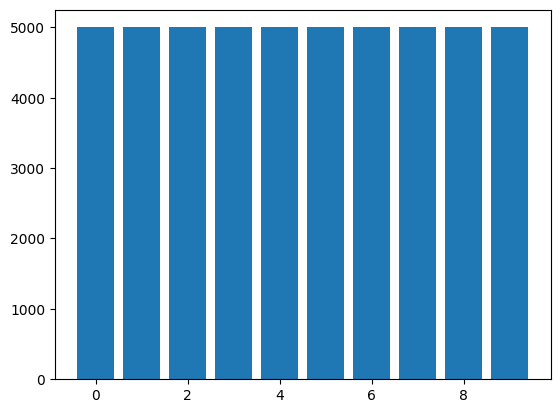

In [12]:
plt.bar(unique, counts)
plt.show()

# MLP for Image Classification
 BASELINE MODEL

In [13]:
mlp_model = models.Sequential(name="MLP_model")

mlp_model.add(layers.InputLayer(input_shape=(32, 32, 3)))
mlp_model.add(layers.Flatten())
mlp_model.add(layers.Dense(132, activation='relu'))
mlp_model.add(layers.Dense(68, activation='relu'))
mlp_model.add(layers.Dense(36, activation='relu'))
mlp_model.add(layers.Dense(10, activation='softmax'))

optimizer = Adam(learning_rate=0.001)

mlp_model.compile(optimizer=optimizer,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

mlp_model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Model: "MLP_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 3072)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 132)            │       405,636 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 68)             │         9,044 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 36)             │         2,484 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │           370 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 417,534 (1.59 MB)

 Trainable params: 417,534 (1.59 MB)

 Non-trainable params: 0 (0.00 B)

In [14]:
mlp_history = mlp_model.fit(X_train,
                            y_train,
                            epochs=50,
                            batch_size=256,
                            validation_split=0.1
                            )

Epoch 1/50
176/176 ━━━━━━━━━━━━━━━━━━━━ 6s 18ms/step - accuracy: 0.2270 - loss: 2.0986 - val_accuracy: 0.3280 - val_loss: 1.8586
Epoch 2/50
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.3597 - loss: 1.8021 - val_accuracy: 0.3736 - val_loss: 1.7549
Epoch 3/50
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.3907 - loss: 1.7108 - val_accuracy: 0.3960 - val_loss: 1.6771
Epoch 4/50
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.4131 - loss: 1.6391 - val_accuracy: 0.3988 - val_loss: 1.6898
Epoch 5/50
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4280 - loss: 1.5983 - val_accuracy: 0.4266 - val_loss: 1.6096
Epoch 6/50
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4418 - loss: 1.5639 - val_accuracy: 0.4368 - val_loss: 1.5873
Epoch 7/50
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4539 - loss: 1.5324 - val_accuracy: 0.4496 - val_loss: 1.5577
Epoch 8/50
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4631 - loss: 1.5053 - val_accuracy: 0

In [15]:
test_loss, test_accuracy = mlp_model.evaluate(X_test, y_test)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.5059 - loss: 1.4374
Test Loss: 1.445804238319397
Test Accuracy: 0.5031999945640564


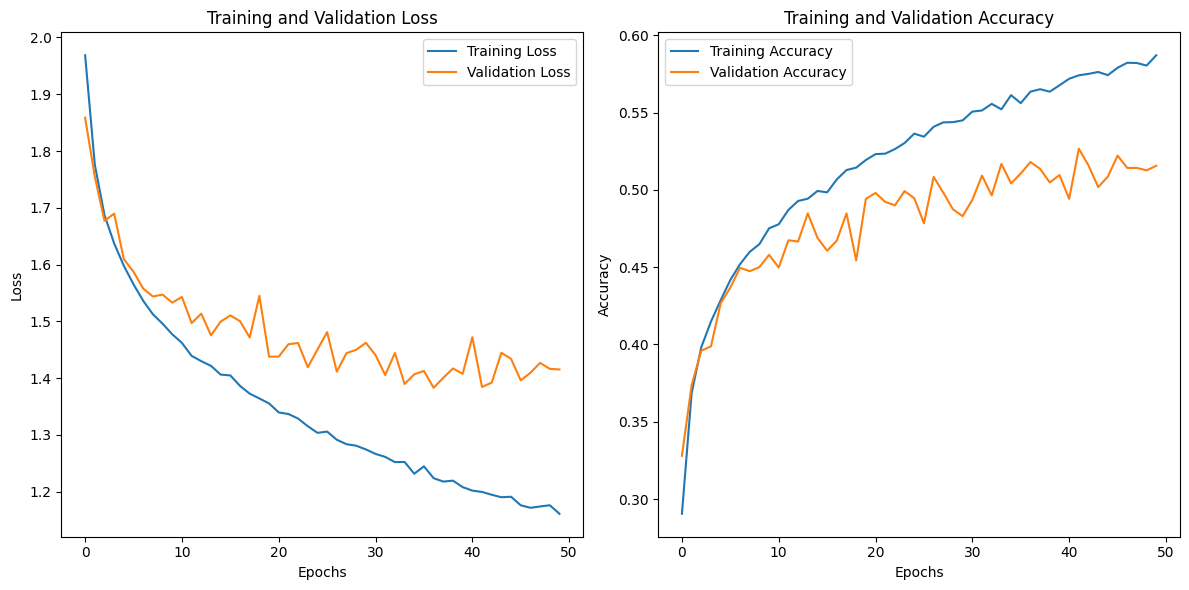

In [16]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(mlp_history.history['loss'], label='Training Loss')
plt.plot(mlp_history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(mlp_history.history['accuracy'], label='Training Accuracy')
plt.plot(mlp_history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

In [17]:
predictions_mlp = mlp_model.predict(X_test)


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [18]:
# what are the predictions?
predictions_mlp[0]

array([0.01660417, 0.01005063, 0.02885024, 0.5683231 , 0.027809  ,
       0.3285649 , 0.0041642 , 0.00310265, 0.00307903, 0.00945206],
      dtype=float32)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


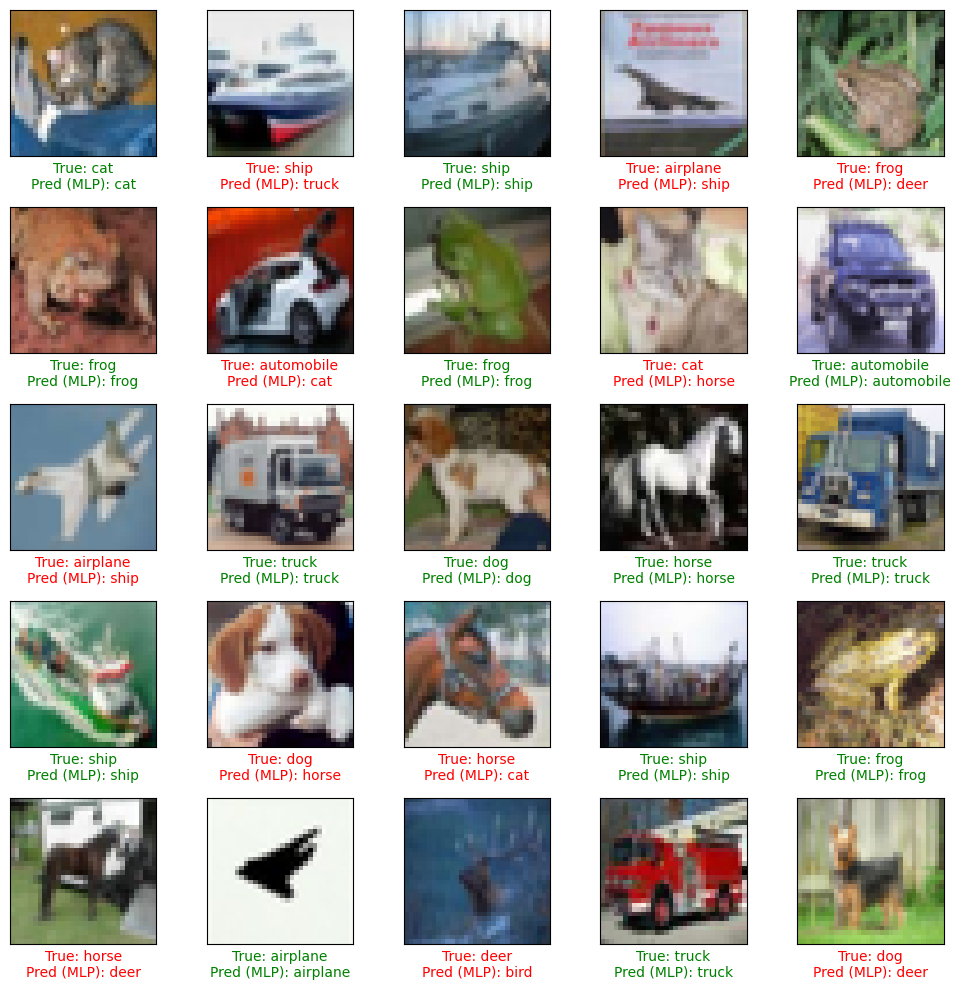

In [22]:
# Get predictions
predictions_mlp = mlp_model.predict(X_test)

# Convert to class labels
predicted_labels_mlp = np.argmax(predictions_mlp, axis=1)

# Now plot
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_test[i])

    true_label = class_names[y_test[i].item()]
    predicted_label_mlp = class_names[predicted_labels_mlp[i]]

    color = 'green' if true_label == predicted_label_mlp else 'red'
    plt.xlabel(f"True: {true_label}\nPred (MLP): {predicted_label_mlp}", color=color)

plt.tight_layout()
plt.show()


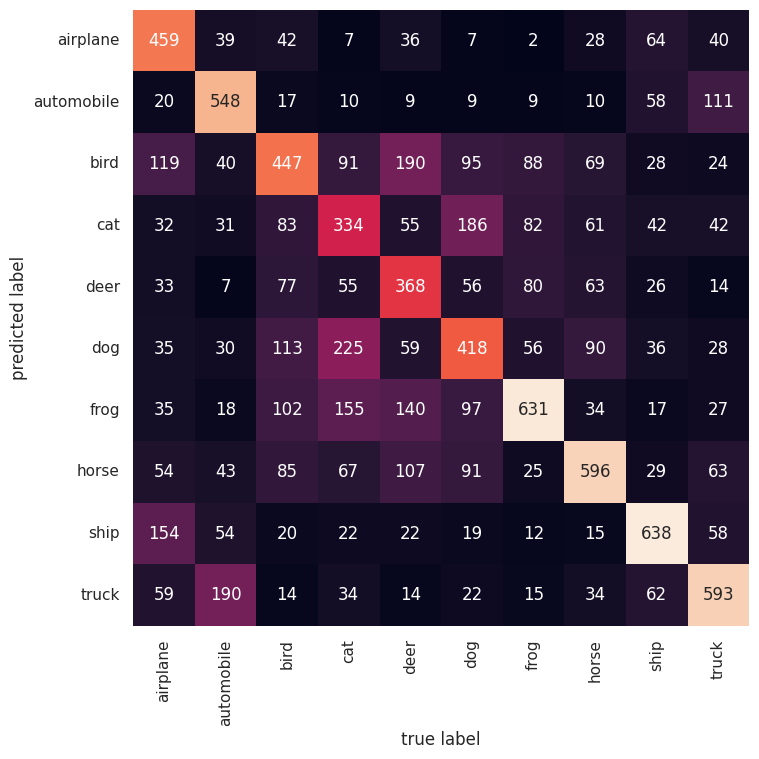

In [23]:
from sklearn.metrics import classification_report,confusion_matrix

mat = confusion_matrix(y_test, predicted_labels_mlp)
plt.figure(figsize=(8, 8)); sns.set()
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False, xticklabels=class_names, yticklabels=class_names)
plt.xlabel('true label'); plt.ylabel('predicted label'); plt.show()

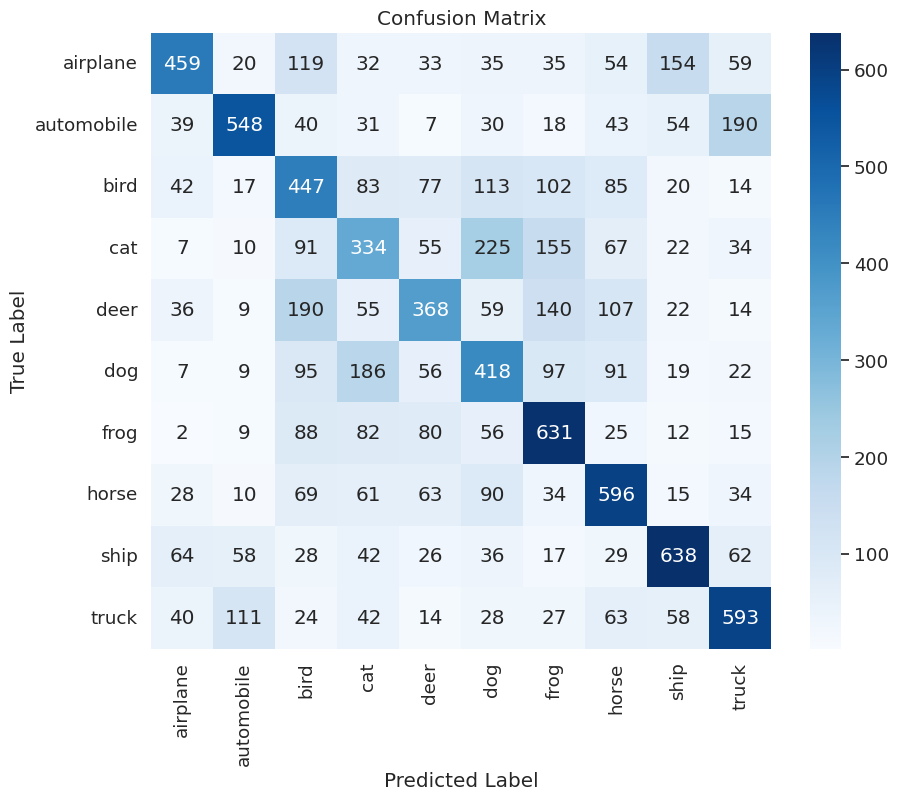

In [24]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Make sure predicted_labels_mlp is defined
predicted_labels_mlp = np.argmax(predictions_mlp, axis=1)

# Compute confusion matrix
mat = confusion_matrix(y_test, predicted_labels_mlp)

# Plot confusion matrix heatmap
plt.figure(figsize=(10, 8))
sns.set(font_scale=1.2)
sns.heatmap(mat, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names,
            yticklabels=class_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


In [25]:
print(classification_report(y_test, predicted_labels_mlp, target_names=class_names))

              precision    recall  f1-score   support

    airplane       0.63      0.46      0.53      1000
  automobile       0.68      0.55      0.61      1000
        bird       0.38      0.45      0.41      1000
         cat       0.35      0.33      0.34      1000
        deer       0.47      0.37      0.41      1000
         dog       0.38      0.42      0.40      1000
        frog       0.50      0.63      0.56      1000
       horse       0.51      0.60      0.55      1000
        ship       0.63      0.64      0.63      1000
       truck       0.57      0.59      0.58      1000

    accuracy                           0.50     10000
   macro avg       0.51      0.50      0.50     10000
weighted avg       0.51      0.50      0.50     10000



In [34]:
from tensorflow.keras import models, layers
from tensorflow.keras.optimizers import Adam

improved_cnn = models.Sequential(name="Improved_CNN")

# Input
improved_cnn.add(layers.InputLayer(input_shape=(32, 32, 3)))

# Conv Block 1
improved_cnn.add(layers.Conv2D(32, (3, 3), padding='same', activation='relu'))
improved_cnn.add(layers.BatchNormalization())
improved_cnn.add(layers.Conv2D(32, (3, 3), padding='same', activation='relu'))
improved_cnn.add(layers.BatchNormalization())
improved_cnn.add(layers.MaxPooling2D((2, 2)))
improved_cnn.add(layers.Dropout(0.25))

# Conv Block 2
improved_cnn.add(layers.Conv2D(64, (3, 3), padding='same', activation='relu'))
improved_cnn.add(layers.BatchNormalization())
improved_cnn.add(layers.Conv2D(64, (3, 3), padding='same', activation='relu'))
improved_cnn.add(layers.BatchNormalization())
improved_cnn.add(layers.MaxPooling2D((2, 2)))
improved_cnn.add(layers.Dropout(0.35))

# Conv Block 3
improved_cnn.add(layers.Conv2D(128, (3, 3), padding='same', activation='relu'))
improved_cnn.add(layers.BatchNormalization())
improved_cnn.add(layers.Conv2D(128, (3, 3), padding='same', activation='relu'))
improved_cnn.add(layers.BatchNormalization())
improved_cnn.add(layers.MaxPooling2D((2, 2)))
improved_cnn.add(layers.Dropout(0.5))

# Dense Head
improved_cnn.add(layers.Flatten())
improved_cnn.add(layers.Dense(256, activation='relu'))
improved_cnn.add(layers.BatchNormalization())
improved_cnn.add(layers.Dropout(0.5))
improved_cnn.add(layers.Dense(10, activation='softmax'))

# Compile
optimizer = Adam(learning_rate=0.001)
improved_cnn.compile(optimizer=optimizer,
                     loss='sparse_categorical_crossentropy',
                     metrics=['accuracy'])

improved_cnn.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Model: "Improved_CNN"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 32, 32, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 16, 16, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 8, 8, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 8, 8, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 8, 8, 128)      │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 8, 8, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 256)            │       524,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 816,938 (3.12 MB)

 Trainable params: 815,530 (3.11 MB)

 Non-trainable params: 1,408 (5.50 KB)

In [35]:
cnn_history = cnn_model.fit(X_train, y_train,
                    epochs=50,
                    batch_size=256,
                    validation_split=0.1)

Epoch 1/50
176/176 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - accuracy: 0.8172 - loss: 0.4954 - val_accuracy: 0.7952 - val_loss: 0.6468
Epoch 2/50
176/176 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - accuracy: 0.8222 - loss: 0.4862 - val_accuracy: 0.7960 - val_loss: 0.6374
Epoch 3/50
176/176 ━━━━━━━━━━━━━━━━━━━━ 5s 19ms/step - accuracy: 0.8190 - loss: 0.4949 - val_accuracy: 0.7970 - val_loss: 0.6320
Epoch 4/50
176/176 ━━━━━━━━━━━━━━━━━━━━ 4s 21ms/step - accuracy: 0.8213 - loss: 0.4902 - val_accuracy: 0.7902 - val_loss: 0.6572
Epoch 5/50
176/176 ━━━━━━━━━━━━━━━━━━━━ 5s 20ms/step - accuracy: 0.8200 - loss: 0.4915 - val_accuracy: 0.7940 - val_loss: 0.6543
Epoch 6/50
176/176 ━━━━━━━━━━━━━━━━━━━━ 5s 20ms/step - accuracy: 0.8202 - loss: 0.4924 - val_accuracy: 0.7924 - val_loss: 0.6573
Epoch 7/50
176/176 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - accuracy: 0.8259 - loss: 0.4762 - val_accuracy: 0.7936 - val_loss: 0.6362
Epoch 8/50
176/176 ━━━━━━━━━━━━━━━━━━━━ 5s 20ms/step - accuracy: 0.8325 - loss: 0.4695 - val_accu

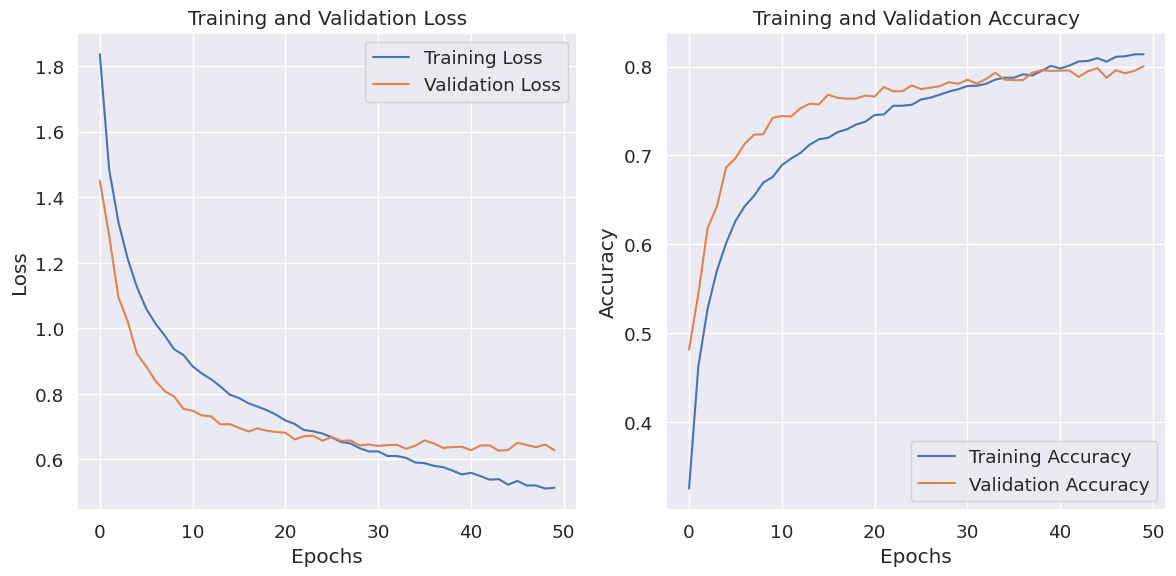

In [28]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(cnn_history.history['loss'], label='Training Loss')
plt.plot(cnn_history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(cnn_history.history['accuracy'], label='Training Accuracy')
plt.plot(cnn_history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

In [29]:
test_loss, test_accuracy = cnn_model.evaluate(X_test, y_test)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7902 - loss: 0.6495
Test Loss: 0.6543304920196533
Test Accuracy: 0.7860000133514404


In [30]:
# Get predictions for the test set
predictions_cnn = cnn_model.predict(X_test)
predicted_labels_cnn = np.argmax(predictions_cnn, axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


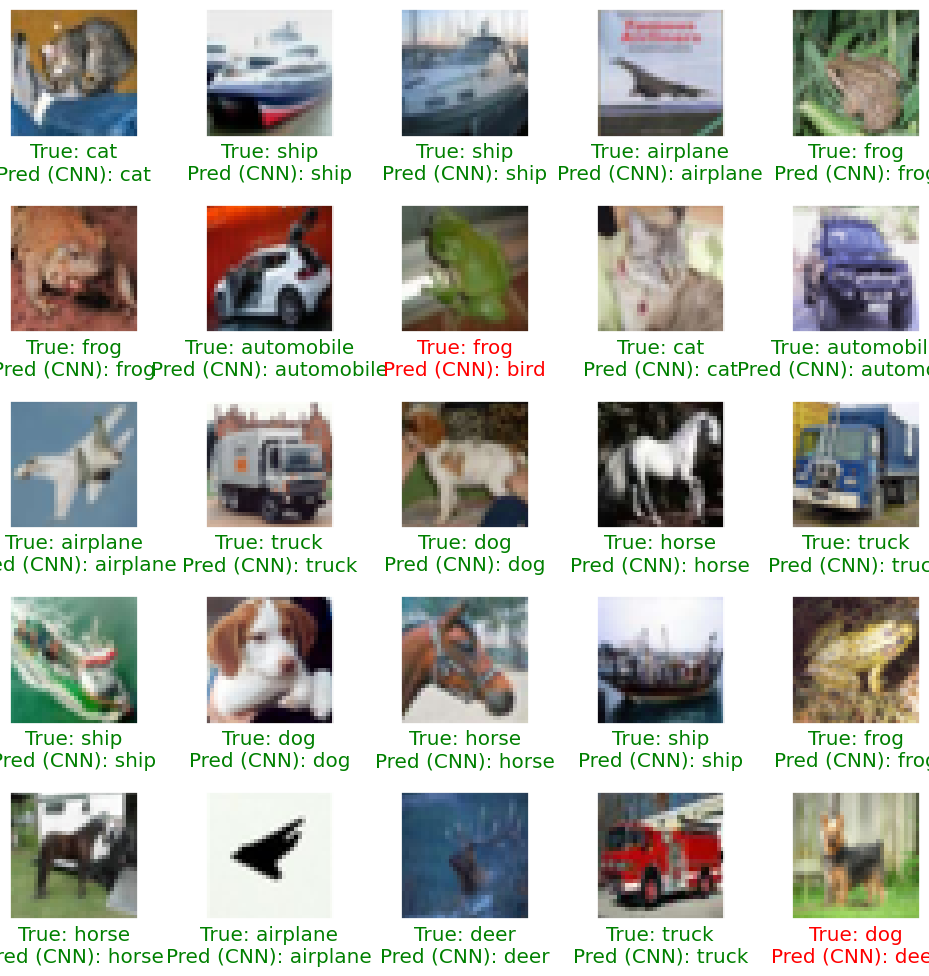

In [31]:
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_test[i])
    true_label = class_names[y_test[i][0]]
    predicted_label = class_names[predicted_labels_cnn[i]]
    if true_label == predicted_label:
        color = 'green'
    else:
        color = 'red'
    plt.xlabel(f"True: {true_label}\nPred (CNN): {predicted_label}", color=color)
plt.tight_layout()
plt.show()

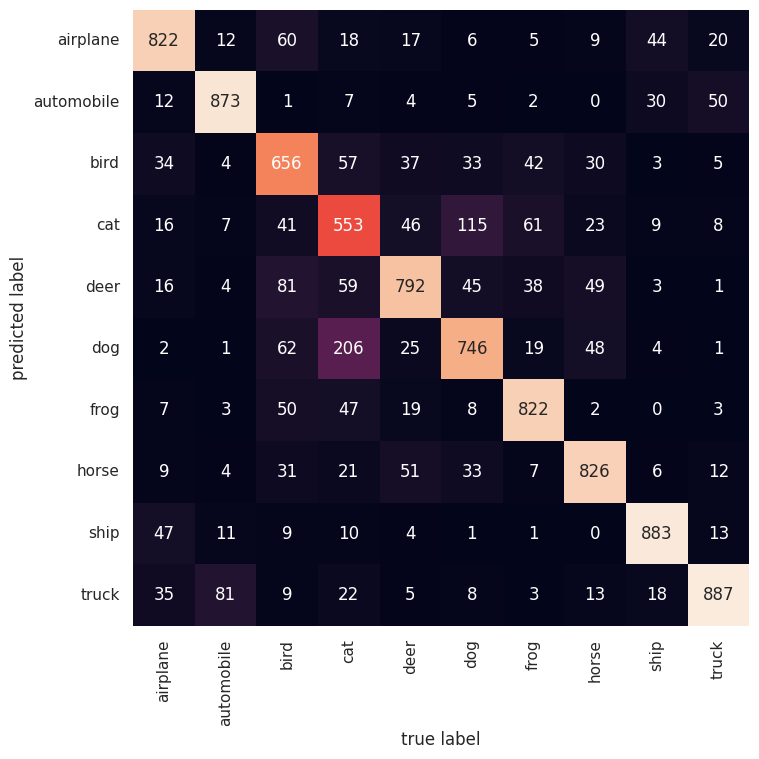

In [32]:
mat = confusion_matrix(y_test, predicted_labels_cnn)
plt.figure(figsize=(8, 8)); sns.set()
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False, xticklabels=class_names, yticklabels=class_names)
plt.xlabel('true label'); plt.ylabel('predicted label'); plt.show()

In [36]:
print(classification_report(y_test, predicted_labels_cnn, target_names=class_names))

              precision    recall  f1-score   support

    airplane       0.81      0.82      0.82      1000
  automobile       0.89      0.87      0.88      1000
        bird       0.73      0.66      0.69      1000
         cat       0.63      0.55      0.59      1000
        deer       0.73      0.79      0.76      1000
         dog       0.67      0.75      0.71      1000
        frog       0.86      0.82      0.84      1000
       horse       0.83      0.83      0.83      1000
        ship       0.90      0.88      0.89      1000
       truck       0.82      0.89      0.85      1000

    accuracy                           0.79     10000
   macro avg       0.79      0.79      0.78     10000
weighted avg       0.79      0.79      0.78     10000



In [37]:
from tensorflow.keras.callbacks import ReduceLROnPlateau

lr_scheduler = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=5,
    verbose=1,
    min_lr=1e-6
)


In [38]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True,
    verbose=1
)


In [39]:
from tensorflow.keras.callbacks import ModelCheckpoint

checkpoint = ModelCheckpoint(
    'best_improved_cnn.h5',
    monitor='val_loss',
    save_best_only=True,
    verbose=1
)


In [40]:
history = improved_cnn.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=100,
    batch_size=64,
    callbacks=[early_stop, lr_scheduler, checkpoint]
)


Epoch 1/100
622/625 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.3253 - loss: 2.1775
Epoch 1: val_loss improved from inf to 1.60992, saving model to best_improved_cnn.h5


625/625 ━━━━━━━━━━━━━━━━━━━━ 20s 13ms/step - accuracy: 0.3258 - loss: 2.1750 - val_accuracy: 0.4393 - val_loss: 1.6099 - learning_rate: 0.0010
Epoch 2/100
620/625 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5493 - loss: 1.2696
Epoch 2: val_loss improved from 1.60992 to 1.12864, saving model to best_improved_cnn.h5


625/625 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - accuracy: 0.5495 - loss: 1.2690 - val_accuracy: 0.6012 - val_loss: 1.1286 - learning_rate: 0.0010
Epoch 3/100
622/625 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6406 - loss: 1.0157
Epoch 3: val_loss improved from 1.12864 to 0.95141, saving model to best_improved_cnn.h5


625/625 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.6407 - loss: 1.0156 - val_accuracy: 0.6637 - val_loss: 0.9514 - learning_rate: 0.0010
Epoch 4/100
623/625 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6903 - loss: 0.8796
Epoch 4: val_loss did not improve from 0.95141
625/625 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - accuracy: 0.6903 - loss: 0.8795 - val_accuracy: 0.6621 - val_loss: 0.9708 - learning_rate: 0.0010
Epoch 5/100
619/625 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7190 - loss: 0.8004
Epoch 5: val_loss improved from 0.95141 to 0.72862, saving model to best_improved_cnn.h5


625/625 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.7191 - loss: 0.8004 - val_accuracy: 0.7423 - val_loss: 0.7286 - learning_rate: 0.0010
Epoch 6/100
624/625 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7422 - loss: 0.7341
Epoch 6: val_loss improved from 0.72862 to 0.71544, saving model to best_improved_cnn.h5


625/625 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.7422 - loss: 0.7341 - val_accuracy: 0.7534 - val_loss: 0.7154 - learning_rate: 0.0010
Epoch 7/100
623/625 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7608 - loss: 0.6845
Epoch 7: val_loss improved from 0.71544 to 0.64227, saving model to best_improved_cnn.h5


625/625 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.7608 - loss: 0.6845 - val_accuracy: 0.7746 - val_loss: 0.6423 - learning_rate: 0.0010
Epoch 8/100
624/625 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7801 - loss: 0.6330
Epoch 8: val_loss improved from 0.64227 to 0.61811, saving model to best_improved_cnn.h5


625/625 ━━━━━━━━━━━━━━━━━━━━ 7s 11ms/step - accuracy: 0.7801 - loss: 0.6330 - val_accuracy: 0.7843 - val_loss: 0.6181 - learning_rate: 0.0010
Epoch 9/100
620/625 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7924 - loss: 0.6003
Epoch 9: val_loss improved from 0.61811 to 0.55796, saving model to best_improved_cnn.h5


625/625 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.7923 - loss: 0.6004 - val_accuracy: 0.8047 - val_loss: 0.5580 - learning_rate: 0.0010
Epoch 10/100
620/625 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8025 - loss: 0.5671
Epoch 10: val_loss did not improve from 0.55796
625/625 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - accuracy: 0.8025 - loss: 0.5672 - val_accuracy: 0.7769 - val_loss: 0.6680 - learning_rate: 0.0010
Epoch 11/100
619/625 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8134 - loss: 0.5338
Epoch 11: val_loss did not improve from 0.55796
625/625 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - accuracy: 0.8134 - loss: 0.5340 - val_accuracy: 0.7729 - val_loss: 0.6639 - learning_rate: 0.0010
Epoch 12/100
621/625 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8211 - loss: 0.5161
Epoch 12: val_loss did not improve from 0.55796
625/625 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.8210 - loss: 0.5162 - val_accuracy: 0.7992 - val_loss: 0.5895 - learning_rate: 0.0010
Epoch 13/100
619/625 ━━━

625/625 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.8519 - loss: 0.4218 - val_accuracy: 0.8412 - val_loss: 0.4689 - learning_rate: 5.0000e-04
Epoch 16/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8670 - loss: 0.3848
Epoch 16: val_loss improved from 0.46894 to 0.45491, saving model to best_improved_cnn.h5


625/625 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - accuracy: 0.8670 - loss: 0.3848 - val_accuracy: 0.8450 - val_loss: 0.4549 - learning_rate: 5.0000e-04
Epoch 17/100
620/625 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8693 - loss: 0.3770
Epoch 17: val_loss did not improve from 0.45491
625/625 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - accuracy: 0.8692 - loss: 0.3770 - val_accuracy: 0.8441 - val_loss: 0.4664 - learning_rate: 5.0000e-04
Epoch 18/100
621/625 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8774 - loss: 0.3524
Epoch 18: val_loss did not improve from 0.45491
625/625 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - accuracy: 0.8774 - loss: 0.3525 - val_accuracy: 0.8347 - val_loss: 0.5028 - learning_rate: 5.0000e-04
Epoch 19/100
621/625 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8738 - loss: 0.3533
Epoch 19: val_loss did not improve from 0.45491
625/625 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.8738 - loss: 0.3534 - val_accuracy: 0.8431 - val_loss: 0.4761 - learning_rate: 5.0000e-04
Epoch 2

625/625 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.8894 - loss: 0.3106 - val_accuracy: 0.8590 - val_loss: 0.4417 - learning_rate: 2.5000e-04
Epoch 23/100
621/625 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8947 - loss: 0.2934
Epoch 23: val_loss improved from 0.44172 to 0.43074, saving model to best_improved_cnn.h5


625/625 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - accuracy: 0.8947 - loss: 0.2934 - val_accuracy: 0.8617 - val_loss: 0.4307 - learning_rate: 2.5000e-04
Epoch 24/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9013 - loss: 0.2799
Epoch 24: val_loss improved from 0.43074 to 0.42473, saving model to best_improved_cnn.h5


625/625 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - accuracy: 0.9013 - loss: 0.2799 - val_accuracy: 0.8648 - val_loss: 0.4247 - learning_rate: 2.5000e-04
Epoch 25/100
621/625 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9003 - loss: 0.2829
Epoch 25: val_loss did not improve from 0.42473
625/625 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.9003 - loss: 0.2829 - val_accuracy: 0.8623 - val_loss: 0.4370 - learning_rate: 2.5000e-04
Epoch 26/100
623/625 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9058 - loss: 0.2689
Epoch 26: val_loss did not improve from 0.42473
625/625 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - accuracy: 0.9058 - loss: 0.2690 - val_accuracy: 0.8618 - val_loss: 0.4318 - learning_rate: 2.5000e-04
Epoch 27/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9058 - loss: 0.2632
Epoch 27: val_loss did not improve from 0.42473
625/625 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.9058 - loss: 0.2632 - val_accuracy: 0.8620 - val_loss: 0.4370 - learning_rate: 2.5000e-04
Epoch 28

625/625 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.9106 - loss: 0.2532 - val_accuracy: 0.8681 - val_loss: 0.4233 - learning_rate: 1.2500e-04
Epoch 31/100
624/625 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9123 - loss: 0.2445
Epoch 31: val_loss did not improve from 0.42334
625/625 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.9123 - loss: 0.2445 - val_accuracy: 0.8686 - val_loss: 0.4261 - learning_rate: 1.2500e-04
Epoch 32/100
623/625 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9180 - loss: 0.2354
Epoch 32: val_loss did not improve from 0.42334
625/625 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.9179 - loss: 0.2355 - val_accuracy: 0.8691 - val_loss: 0.4250 - learning_rate: 1.2500e-04
Epoch 33/100
621/625 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9179 - loss: 0.2336
Epoch 33: val_loss did not improve from 0.42334
625/625 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.9179 - loss: 0.2336 - val_accuracy: 0.8694 - val_loss: 0.4235 - learning_rate: 1.2500e-04
Epoch 34/10

625/625 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.9220 - loss: 0.2206 - val_accuracy: 0.8699 - val_loss: 0.4233 - learning_rate: 6.2500e-05
Epoch 37/100
622/625 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9228 - loss: 0.2175
Epoch 37: val_loss did not improve from 0.42331
625/625 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.9228 - loss: 0.2175 - val_accuracy: 0.8702 - val_loss: 0.4280 - learning_rate: 6.2500e-05
Epoch 38/100
623/625 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9227 - loss: 0.2145
Epoch 38: val_loss did not improve from 0.42331
625/625 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.9227 - loss: 0.2145 - val_accuracy: 0.8696 - val_loss: 0.4286 - learning_rate: 6.2500e-05
Epoch 39/100
619/625 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9247 - loss: 0.2127
Epoch 39: val_loss did not improve from 0.42331
625/625 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.9247 - loss: 0.2127 - val_accuracy: 0.8710 - val_loss: 0.4276 - learning_rate: 6.2500e-05
Epoch 40/100

In [41]:
from tensorflow.keras.optimizers import SGD

optimizer_sgd = SGD(learning_rate=0.01, momentum=0.9, nesterov=True)
improved_cnn.compile(optimizer=optimizer_sgd, loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [42]:
from tensorflow.keras.models import load_model

best_model = load_model('best_improved_cnn.h5')

test_loss, test_acc = best_model.evaluate(X_test, y_test)
print(f"Final Test Accuracy: {test_acc:.4f}")


313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8670 - loss: 0.4269
Final Test Accuracy: 0.8658


# Plot training & validation accuracy/loss

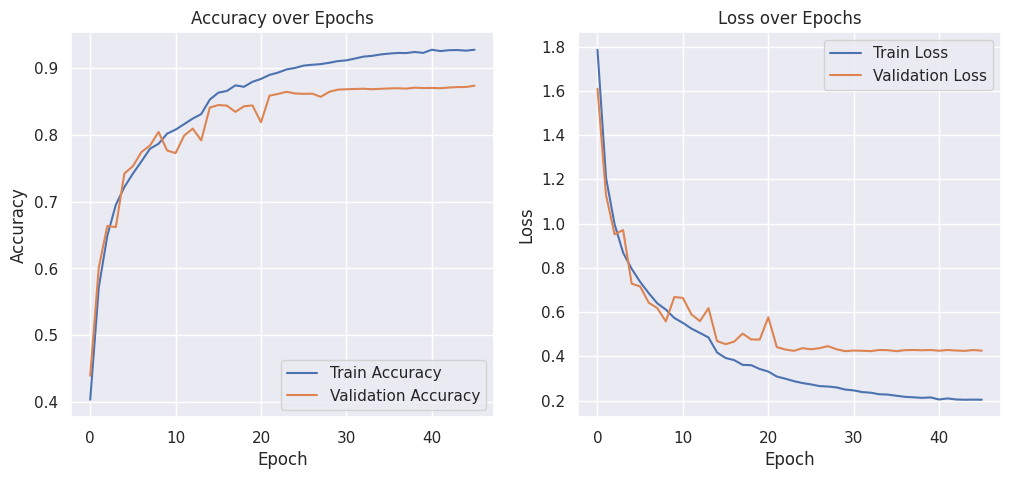

In [43]:
import matplotlib.pyplot as plt

# Accuracy plot
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()


# Confusion Matrix & Classification Report

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step


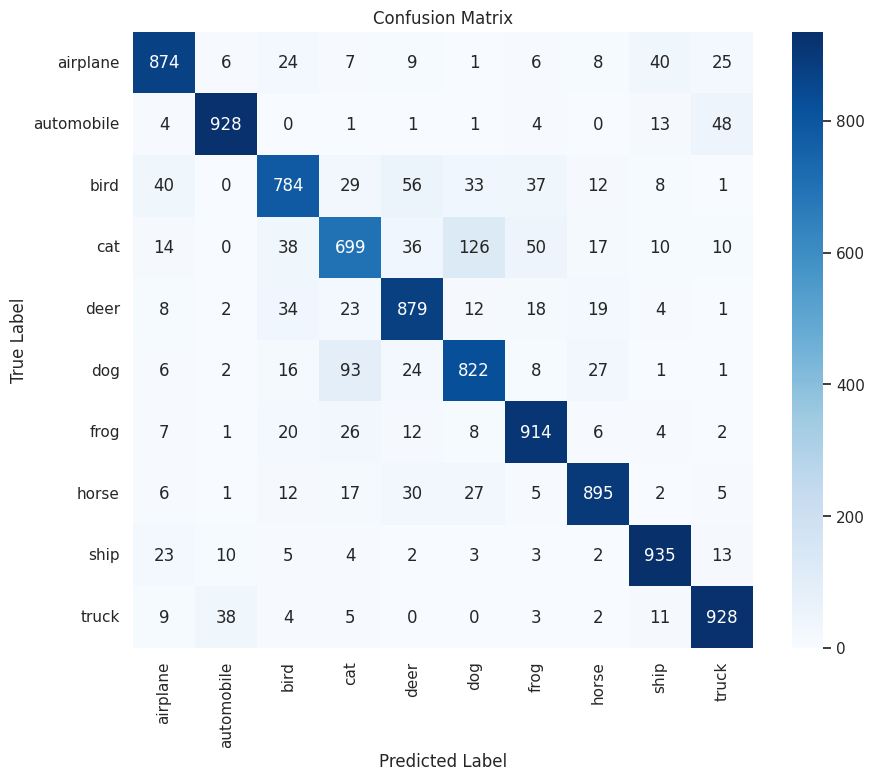

              precision    recall  f1-score   support

    airplane       0.88      0.87      0.88      1000
  automobile       0.94      0.93      0.93      1000
        bird       0.84      0.78      0.81      1000
         cat       0.77      0.70      0.73      1000
        deer       0.84      0.88      0.86      1000
         dog       0.80      0.82      0.81      1000
        frog       0.87      0.91      0.89      1000
       horse       0.91      0.90      0.90      1000
        ship       0.91      0.94      0.92      1000
       truck       0.90      0.93      0.91      1000

    accuracy                           0.87     10000
   macro avg       0.86      0.87      0.86     10000
weighted avg       0.86      0.87      0.86     10000



In [44]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import numpy as np

# Predict class labels
y_pred_probs = improved_cnn.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Classification report
print(classification_report(y_test, y_pred, target_names=class_names))


# Report test accuracy

In [45]:
test_loss, test_acc = improved_cnn.evaluate(X_test, y_test)
print(f'Test Loss: {test_loss:.4f}')
print(f'Test Accuracy: {test_acc:.4f}')


313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8670 - loss: 0.4269
Test Loss: 0.4320
Test Accuracy: 0.8658


## Test Loss: 0.4320
## Test Accuracy: 0.8658